In [14]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['pdf.fonttype'] = 42

In [30]:
data = pd.read_csv("../data/RNA_seq_PCA_df.csv",index_col=0)

score = pd.read_csv("../data/TCGA_STAD_PUL_score.csv",sep=",",index_col=0)

a = data.loc[score.index,["0","1"]]

In [31]:
X_embedded = TSNE(n_components=2,random_state=0).fit_transform(a)
X_embedded.shape

/home/jovi/anaconda3/envs/r4/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jovi/anaconda3/envs/r4/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(324, 2)

In [24]:
score.groupby("Subtype").count()

,PUL_Score
Subtype,
MSI-H & TMB-H & TILs-H,40
MSS-NR,229
MSS-PR,55


/home/jovi/anaconda3/envs/r4/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jovi/anaconda3/envs/r4/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


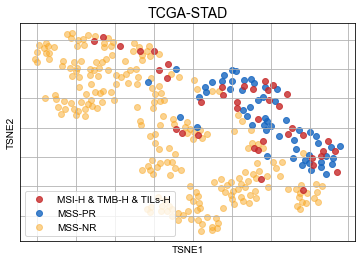

In [39]:
X_embedded = TSNE(n_components=2,random_state=20).fit_transform(a)
X_embedded.shape
fig = plt.figure()
fig.set_size_inches(6,4)
plt.scatter(X_embedded[95:,0], X_embedded[95:,1],c="#F9A825",label="MSS-NR",alpha=0.5)
plt.scatter(X_embedded[40:95,0], X_embedded[40:95,1],c="#1565C0",label="MSS-PR",alpha=0.8)
plt.scatter(X_embedded[:40,0], X_embedded[:40,1],c="#C62828",label="MSI-H & TMB-H & TILs-H",alpha=0.8)
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=3,fontsize=10)
plt.grid(True)
plt.title("TCGA-STAD",fontsize=14)
plt.tick_params(left=False,
                    bottom=False,
                    labelleft=False,
                    labelbottom=False)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.savefig("TCGA-STAD_tsne.pdf",bbox_inches='tight',dpi=600)

/home/jovi/anaconda3/envs/r4/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jovi/anaconda3/envs/r4/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


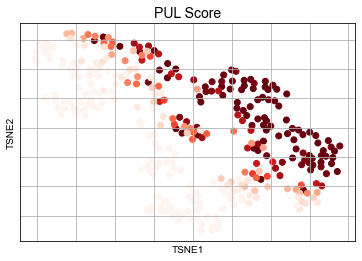

In [41]:
X_embedded = TSNE(n_components=2,random_state=20).fit_transform(a)
X_embedded.shape
fig = plt.figure()
fig.set_size_inches(6,4)
plt.scatter(X_embedded[:,0], X_embedded[:,1],c=score["PUL_Score"],label="aa",cmap='Reds')
plt.grid(True)
plt.title("PUL Score",fontsize=14)
plt.tick_params(left=False,
                    bottom=False,
                    labelleft=False,
                    labelbottom=False)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
# cax = plt.axes([0.85, 0.1, 0.02, 0.8])
# plt.colorbar(cax=cax,shrink=0.5)
# plt.savefig("ColorBar_legend.pdf",bbox_inches='tight',dpi=600)
plt.savefig("TCGA-STAD_tsne_colorbar.pdf",bbox_inches='tight',dpi=600)

In [93]:
m = np.zeros((1,101))
for i in range(101):
    m[0,i] = i/100.0
print(m)

[[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
  0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
  0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
  0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
  0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
  0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
  0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
  0.98 0.99 1.  ]]


In [110]:
m = m.reshape(101,1)

No handles with labels found to put in legend.


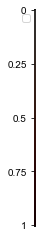

In [111]:
plt.imshow(m, cmap='Reds', aspect=2)
plt.xticks(np.arange(0))
plt.yticks([  0,  25,  50,  75,  100], [0,0.25,0.50,0.75,1])
plt.legend()
plt.show()

In [95]:
np.arange(0,25,5), [0,25,50,75,100]

(array([ 0,  5, 10, 15, 20]), [0, 25, 50, 75, 100])

In [104]:
np.arange(0,101,20), [0,0.25,0.50,0.75,1]

(array([  0,  20,  40,  60,  80, 100]), [0, 0.25, 0.5, 0.75, 1])